# 数据分析概括

主要目录

* 整体数据探测
* 分析数据不同类别分布
* 分析图片长宽比例分布
* 切分数据集和验证集

通过本章节学习，大家可以掌握如下知识点 

* 掌握 pyecharts ，seaborn 如何快速绘制图表；

* 加深python 基本操作，如类似list 列表推导式，dict 类型数据排序，walk 文件遍历操作，glob 文件匹配处理

## 01. 整体数据探测

In [5]:
import os 
from os import walk

base_path = '../data/'
data_path = os.path.join(base_path,'garbage_classify/train_data')

# 数据路径
print('data_path = ',data_path)

for (dirpath,dirnames,filenames) in walk(data_path):
    print('*' * 60)
    
    print('Directory path:', dirpath)
    print('total examples = ', len(filenames))
    print('file name example:', filenames[:5]) # 文件的列表

data_path =  ../data/garbage_classify/train_data
************************************************************
Directory path: ../data/garbage_classify/train_data
total examples =  29604
file name example: ['img_3047.txt', 'img_15477.txt', 'img_3781.txt', 'img_15693.txt', 'img_4844.txt']


我们需要分析 *.txt 读取内容，然后img.txt

首先，我们需要配置.txt 文件进行输出

In [26]:
from glob import glob


def get_image_info():     
    data_path_txt = os.path.join(data_path, '*.txt')  # 获取所有*.txt 文件
    txt_file_list = glob(data_path_txt)  # 将所有的txt文件以列表形式保存
    
    img_path_list = []
    img_name2label_dict = {}
    img_label_dict = {}  # <img_label, img_count>


    for file_path in txt_file_list:
        # 读取图片文件内容
        with open(file_path, 'r') as f:
            line = f.readline()  # 读取一行内容: img_3047.jpg, 7
        line = line.strip()  # 取出首位的空格
        img_name = line.split(',')[0]  # img_3047.jpg
        img_label = int(line.split(',')[1])  # 7
        
        # 拼接文件路径
        img_name_path = os.path.join(data_path, '{}'.format(img_name))
        
        # 将文件路径存储到list中
        img_path_list.append({'img_name_path': img_name_path, 'img_label': img_label})
        
        # 以字典的方式存储 key：img_name  value：img_label
        img_name2label_dict[img_name] = img_label
        
        # 统计每个标签出现的次数，<img_label, img_count>
        img_label_count = img_label_dict.get(img_label, 0)
        if img_label_count:
            img_label_dict[img_label] = img_label_count + 1
        else:
            img_label_dict[img_label] = 1
        
    # 返回最终结果
    return img_path_list, img_label_dict, img_name2label_dict

In [38]:
img_path_list, img_label_dict, img_name2label_dict = get_image_info()
print('\n', 'img_path_list = ',img_path_list[:3])
print('\n', 'img_label_dict = ',img_label_dict)
print('\n', 'img_label_dict len = ',len(img_label_dict))
# print('\n', 'img_name2label_dict = ',img_name2label_dict)
# get_image_info()   


 img_path_list =  [{'img_name_path': '../data/garbage_classify/train_data/img_3047.jpg', 'img_label': 7}, {'img_name_path': '../data/garbage_classify/train_data/img_15477.jpg', 'img_label': 31}, {'img_name_path': '../data/garbage_classify/train_data/img_3781.jpg', 'img_label': 9}]

 img_label_dict =  {7: 362, 31: 446, 9: 389, 11: 736, 28: 382, 17: 309, 26: 351, 10: 387, 13: 409, 39: 437, 8: 380, 14: 357, 5: 289, 18: 362, 34: 395, 27: 536, 12: 331, 22: 375, 3: 85, 6: 395, 30: 321, 4: 387, 35: 351, 2: 279, 20: 226, 36: 265, 15: 419, 38: 391, 21: 657, 33: 322, 1: 370, 29: 416, 32: 280, 25: 550, 16: 352, 0: 242, 37: 322, 23: 309, 24: 318, 19: 312}

 img_label_dict len =  40


## 02. 数据不同类别分布¶
我们这里通过柱状图 来分析不同类别分布情况，我们使用pyecharts 这种效果非常棒的工具来展示

x 轴数据： 标签名称

y 轴数据： 标签名称对应次数

首先我们 img_label_dict 按照key 进行排序，这样方便查看数据

In [39]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [50]:
# 默认情况key 进行排序
img_label_dict = dict(sorted(img_label_dict.items()))
print(img_label_dict)

{0: 242, 1: 370, 2: 279, 3: 85, 4: 387, 5: 289, 6: 395, 7: 362, 8: 380, 9: 389, 10: 387, 11: 736, 12: 331, 13: 409, 14: 357, 15: 419, 16: 352, 17: 309, 18: 362, 19: 312, 20: 226, 21: 657, 22: 375, 23: 309, 24: 318, 25: 550, 26: 351, 27: 536, 28: 382, 29: 416, 30: 321, 31: 446, 32: 280, 33: 322, 34: 395, 35: 351, 36: 265, 37: 322, 38: 391, 39: 437}


In [51]:
label_dict = {
    "0": "其他垃圾/一次性快餐盒",
    "1": "其他垃圾/污损塑料",
    "2": "其他垃圾/烟蒂",
    "3": "其他垃圾/牙签",
    "4": "其他垃圾/破碎花盆及碟碗",
    "5": "其他垃圾/竹筷",
    "6": "厨余垃圾/剩饭剩菜",
    "7": "厨余垃圾/大骨头",
    "8": "厨余垃圾/水果果皮",
    "9": "厨余垃圾/水果果肉",
    "10": "厨余垃圾/茶叶渣",
    "11": "厨余垃圾/菜叶菜根",
    "12": "厨余垃圾/蛋壳",
    "13": "厨余垃圾/鱼骨",
    "14": "可回收物/充电宝",
    "15": "可回收物/包",
    "16": "可回收物/化妆品瓶",
    "17": "可回收物/塑料玩具",
    "18": "可回收物/塑料碗盆",
    "19": "可回收物/塑料衣架",
    "20": "可回收物/快递纸袋",
    "21": "可回收物/插头电线",
    "22": "可回收物/旧衣服",
    "23": "可回收物/易拉罐",
    "24": "可回收物/枕头",
    "25": "可回收物/毛绒玩具",
    "26": "可回收物/洗发水瓶",
    "27": "可回收物/玻璃杯",
    "28": "可回收物/皮鞋",
    "29": "可回收物/砧板",
    "30": "可回收物/纸板箱",
    "31": "可回收物/调料瓶",
    "32": "可回收物/酒瓶",
    "33": "可回收物/金属食品罐",
    "34": "可回收物/锅",
    "35": "可回收物/食用油桶",
    "36": "可回收物/饮料瓶",
    "37": "有害垃圾/干电池",
    "38": "有害垃圾/软膏",
    "39": "有害垃圾/过期药物"
}

In [52]:
# 首先，构建数据
x = img_label_dict.keys()
y = img_label_dict.values()

# 列表推导式
x = ["{}-{}".format(label_idx, label_dict[str(label_idx)])
     for label_idx in img_label_dict.keys()]
print(x)

['0-其他垃圾/一次性快餐盒', '1-其他垃圾/污损塑料', '2-其他垃圾/烟蒂', '3-其他垃圾/牙签', '4-其他垃圾/破碎花盆及碟碗', '5-其他垃圾/竹筷', '6-厨余垃圾/剩饭剩菜', '7-厨余垃圾/大骨头', '8-厨余垃圾/水果果皮', '9-厨余垃圾/水果果肉', '10-厨余垃圾/茶叶渣', '11-厨余垃圾/菜叶菜根', '12-厨余垃圾/蛋壳', '13-厨余垃圾/鱼骨', '14-可回收物/充电宝', '15-可回收物/包', '16-可回收物/化妆品瓶', '17-可回收物/塑料玩具', '18-可回收物/塑料碗盆', '19-可回收物/塑料衣架', '20-可回收物/快递纸袋', '21-可回收物/插头电线', '22-可回收物/旧衣服', '23-可回收物/易拉罐', '24-可回收物/枕头', '25-可回收物/毛绒玩具', '26-可回收物/洗发水瓶', '27-可回收物/玻璃杯', '28-可回收物/皮鞋', '29-可回收物/砧板', '30-可回收物/纸板箱', '31-可回收物/调料瓶', '32-可回收物/酒瓶', '33-可回收物/金属食品罐', '34-可回收物/锅', '35-可回收物/食用油桶', '36-可回收物/饮料瓶', '37-有害垃圾/干电池', '38-有害垃圾/软膏', '39-有害垃圾/过期药物']


In [58]:
# 通过pyecharts 绘制图表

## 导入相应的库
from pyecharts import options as opts
from pyecharts.charts import Bar

## 构建pyecharts所需要的数据
x = list(x)
y = list(y)

## 创建pyecharts的Bar对象
bar = Bar(init_opts=opts.InitOpts(width='1100px', height='500px'))

## 向Bar对象中添加数据
bar.add_xaxis(xaxis_data=x)
bar.add_yaxis(series_name='', yaxis_data=y)

## 设置全局参数
bar.set_global_opts(
    # 增加标题
    title_opts = opts.TitleOpts(title='垃圾分类数据 不同类别数据分布图'),
    # 使x轴坐标轴的数据倾斜
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=15))
)

## 展示图表
bar.render_notebook()

## 03. 数据长度和高度分布比例

Python 如何获取JPG 图片的长度和高度信息？

### 3.1 PIL中 Image类 处理数据

In [59]:
# 导入PIL 库
from PIL import Image

# 获取一张图片
base_path = '../data/'
data_path = os.path.join(base_path, 'garbage_classify/train_data')
pic_file_name = os.path.join(data_path, 'img_1.jpg')
print('pic_file_name = ', pic_file_name)

# 获取长度和高度
img = Image.open(pic_file_name)
print('img.size = ', img.size)

pic_file_name =  ../data/garbage_classify/train_data/img_1.jpg
img.size =  (800, 575)


### 3.2 统计所有图片，来获取全部图片的比例信息

In [71]:
from glob import glob
import os
from PIL import Image

data_path_jpg = os.path.join(data_path, '*.jpg')
data_path_list = glob(data_path_jpg)
data_list = []

for file_path in data_path_list:
    
    # 读取图像及其宽高，并据此计算出宽高比
    img = Image.open(file_path)
    width = img.size[0]
    heigh = img.size[1]
    ratio = float("{:.2f}".format(width/heigh))
    
    # 得到图像的名称，id号码，类别标签，并保存到data_list中
    img_name = file_path.split('/')[-1]
    img_id = img_name.split('_')[1].split('.')[0]
    img_label = img_name2label_dict.get(img_name, 0)
    
    # [[6798, 750, 1001, 0.75, 14], ..., []]
    data_list.append([int(img_id), width, heigh, ratio, int(img_label)])

In [76]:
data_list[:3]
print(len(data_list))

14802


### 3.3 使用seaborn展示

首先，我们来分析单变量进行数据分析，这个时候我们直方图来完成。


Python 中的seaborn 可视化工具库进行展示

In [77]:
ratio_list = [ratio[3] for ratio in data_list]
print(ratio_list[:5])

[0.75, 0.99, 0.75, 1.5, 1.25]


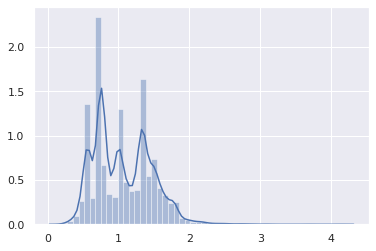

In [78]:
# 导入可视化库
import seaborn as sns
# 导入计算库
import numpy as np

sns.set()
np.random.seed(0)

# seaborn 直方图展示
ax = sns.distplot(ratio_list)

从上图看出，大部分数据集中在[0, 2]区间中，下面取出[0, 2] 中的数据在进行可视化

In [79]:
# 需要过滤ratio_list 数据，list 类型
help(filter)

Help on class filter in module builtins:

class filter(object)
 |  filter(function or None, iterable) --> filter object
 |  
 |  Return an iterator yielding those items of iterable for which function(item)
 |  is true. If function is None, return the items that are true.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



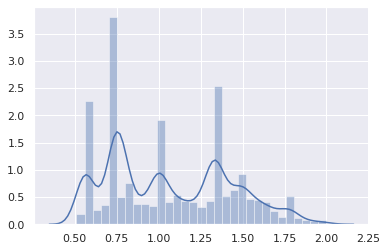

In [85]:
ratio_list = list(filter(lambda x:x>0.5 and x<=2,ratio_list))

# 导入可视化库
import seaborn as sns
# 导入计算库
import numpy as np

sns.set()
np.random.seed(0)

# seaborn 直方图展示
ax = sns.distplot(ratio_list) # 告诉我么数据分布（0，2）

从上面内容，我们 数据整体分布（0.5，1.5） 之间。

# 切分数据集－训练集和验证集

对于分类问题，我们需要切分训练数据和验证数据

In [140]:
# 原始数据格式
img_path_list[:2]

[{'img_name_path': '../data/garbage_classify/train_data/img_1.jpg',
  'img_label': 0},
 {'img_name_path': '../data/garbage_classify/train_data/img_10.jpg',
  'img_label': 0}]

In [141]:
# 原始数据大小
len(img_path_list)

14802

In [147]:
# 原始数据进行shuffle
import random 
random.shuffle(img_path_list)

# 数据分布分布 0.8 0.2
img_count = len(img_path_list)
train_size = int(img_count*0.8)

print('img_count = ',img_count)
print('train_size = ',train_size)
train_img_list = img_path_list[:train_size]
val_img_list = img_path_list[train_size:]

print('train_img_list size = ',len(train_img_list))
print('val_img_list size = ',len(val_img_list))

img_count =  14802
train_size =  11841
train_img_list size =  11841
val_img_list size =  2961


数据切分后，我们就可以生成训练和验证数据了 

In [156]:
import shutil
# 训练数据的生成

with open(os.path.join(base_path,'40_garbage-classify-for-pytorch/train.txt'),'w') as f:
    for img_dict in train_img_list:
        
        # 文本格式数据
        img_name_path = img_dict['img_name_path']#'../data/garbage_classify/train_data/img_1.jpg'
        img_label = img_dict['img_label']
        
        f.write("{}\t{}\n".format(img_name_path,img_label))
        
        # 图片－标签目录
        garbage_classify_dir = os.path.join(base_path,'40_garbage-classify-for-pytorch/train/{}'.format(img_label))
        
        ## 目录创建
        if not os.path.exists(garbage_classify_dir):
            os.makedirs(garbage_classify_dir)
        
        ## 图片数据进行拷贝
        shutil.copy(img_name_path,garbage_classify_dir)

# 验证数据的生成
with open(os.path.join(base_path,'40_garbage-classify-for-pytorch/val.txt'),'w') as f:
    for img_dict in val_img_list:
        
        # 文本格式数据
        img_name_path = img_dict['img_name_path']#'../data/garbage_classify/train_data/img_1.jpg'
        img_label = img_dict['img_label']
        
        f.write("{}\t{}\n".format(img_name_path,img_label))
        
        # 图片－标签目录
        garbage_classify_dir = os.path.join(base_path,'40_garbage-classify-for-pytorch/val/{}'.format(img_label))
        
        ## 目录创建
        if not os.path.exists(garbage_classify_dir):
            os.makedirs(garbage_classify_dir)
        
        ## 图片数据进行拷贝
        shutil.copy(img_name_path,garbage_classify_dir)


# 训练数据和验证数据可视化分布

目前统计训练和验证数据 <label,count> ,然后统计图表的方式在一张图展示

In [167]:
import codecs
# 获取数据内容
train_path = os.path.join(base_path,'40_garbage-classify-for-pytorch/train.txt')
val_path = os.path.join(base_path,'40_garbage-classify-for-pytorch/val.txt')
print('train_path = ',train_path)
print('val_path = ',val_path)

# 统计<label,count> 
def get_label_idx_list(data_path):
    label_idx_list = []
    
    for line in codecs.open(data_path,'r'):
        line = line.strip()
        label_idx = line.split('\t')[1]
        label_idx_list.append(int(label_idx))
    return label_idx_list

from collections import Counter

## Counter 统计label 出现次数
## dict 类别转化
##dict 中的key 进行sort asc
train_dict = dict(Counter(get_label_idx_list(train_path)))
train_dict = dict(sorted(train_dict.items()))


val_dict = dict(Counter(get_label_idx_list(val_path)))
val_dict = dict(sorted(val_dict.items()))


print('train_dict = ',train_dict)
print('val_dict = ',val_dict)

train_path =  ../data/40_garbage-classify-for-pytorch/train.txt
val_path =  ../data/40_garbage-classify-for-pytorch/val.txt
train_dict =  {0: 198, 1: 291, 2: 231, 3: 72, 4: 306, 5: 243, 6: 307, 7: 294, 8: 301, 9: 322, 10: 320, 11: 579, 12: 266, 13: 320, 14: 280, 15: 336, 16: 293, 17: 240, 18: 288, 19: 254, 20: 173, 21: 520, 22: 290, 23: 250, 24: 248, 25: 432, 26: 294, 27: 437, 28: 305, 29: 338, 30: 257, 31: 361, 32: 223, 33: 260, 34: 313, 35: 267, 36: 219, 37: 265, 38: 309, 39: 339}
val_dict =  {0: 44, 1: 79, 2: 48, 3: 13, 4: 81, 5: 46, 6: 88, 7: 68, 8: 79, 9: 67, 10: 67, 11: 157, 12: 65, 13: 89, 14: 77, 15: 83, 16: 59, 17: 69, 18: 74, 19: 58, 20: 53, 21: 137, 22: 85, 23: 59, 24: 70, 25: 118, 26: 57, 27: 99, 28: 77, 29: 78, 30: 64, 31: 85, 32: 57, 33: 62, 34: 82, 35: 84, 36: 46, 37: 57, 38: 82, 39: 98}


In [185]:
# 可视化操作
from pyecharts import options as opts
from pyecharts.charts import Bar

# 构建数据

## check train == val  keys 
assert train_dict.keys() == val_dict.keys()


# 借助python 中列表推导方法
x = ["{}-{}".format(label_idx,label_dict[str(label_idx)] )
     for label_idx in train_dict.keys()]

## train 
train_y = list(train_dict.values())
## val
val_y = list(val_dict.values())

# 创建Bar示例
bar = Bar(init_opts=opts.InitOpts(width='1100px',height='500px'))
bar.add_xaxis(xaxis_data=x)
bar.add_yaxis(series_name='Train',yaxis_data=train_y)
bar.add_yaxis(series_name='Val',yaxis_data=val_y)

# 设置全局参数
bar.set_global_opts(
    title_opts=opts.TitleOpts(title='垃圾分类 Train/Val 不同类别数据分布'),
    # 使得我们的x 轴数据倾斜
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate = 15) ) 
)

# 展示图表
bar.render_notebook()